# Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak paramenters iteratively in order to minimize a cost function.

Types of Gradient Descent:

- __Batch Gradient Descent__
- __Stochastic Gradient Descent__
- __Mini-batch Gradient Descent__

Gradient Descent does : it measures teh local gradient of the error function with regards to the parameter vector $\theta$, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

We start by filling $\theta$ with random values(random initialization) and then improve it gradually, taking one baby step at a time, each step attempting to decrease teh cost function until the algorithm converges to a minimum. 

An important paprameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the _learning rate_ is too small, which will take a long time.
If the _learning rate_ is too large, which can miss the optimal solution.

MSE cost function for a Linear Regression model happens to be a _convex function_, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve.

- That implies that there are no local minima, just one gloabl minimum.
- It is also a continuous function with a slope that never changes abruptly.

These two factors have a great consequence : Gradient Descent is guranteed to approach arbitarily close the global minimum.


__When using Gradient Descent, we should ensure that all features have a similar scale, or else it will take much longer to converge.__

Training a model means searchng for a combination of model parameters that minimizes a cost function. It is a search in the model's parameter space: the more parameters a model has the more dimensions this space has, and the harder the search is.

<br>

## Batch Gradient Descent: 
<br>
To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$. This is called a _partial derivative._ 

Partial derivative of the cost function:

$$ \frac{\partial}{\partial\theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^m (\theta^T.x^{(i)}- y^{(i)}) x_j^{(i)} $$

To compute all in one go we can use below formula : 

$$\nabla_\theta MSE(\theta) = \begin{vmatrix}   
                                \frac{\partial}{\partial\theta_0} MSE(\theta) \\ 
                                \frac{\partial}{\partial\theta_1} MSE(\theta) \\ 
                                 . \\
                                 . \\
                                 . \\
                                 \frac{\partial}{\partial\theta_n} MSE(\theta)
                                \end{vmatrix}
               = \frac{2}{m}\mathbf{X}^T.(\mathbf{X}.\theta - y)$$
<br>
<br>
Above formula involves calculations over the full training set $\mathbf{X}$ at each Gradient Descent step. This is why the algorithm is called _Batch Gradient Descent_: it uses the whole batch of training data at every step. As a result it is terribly slow on large training sets. However Gradient Descent scales well with the number of features. So training a Linear Regression model when there are hundreds of features is much faster using Gradient Descent than Normal Equation.
<br>

### Implementation of the algorithm

In [22]:
import numpy as np

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

X = 2 * np.random.rand(100,1)
y = 4+3*x+ np.random.randn(100,1)

X_b = np.c_[np.ones((100,1)),X]

theta = np.random.randn(2,1) # random intialization

for itr in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [23]:
theta

array([[-0.26465683],
       [ 2.72016917]])

In [24]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

In [25]:
X_new_b.dot(theta)

array([[-0.26465683],
       [ 5.1756815 ]])

In [26]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

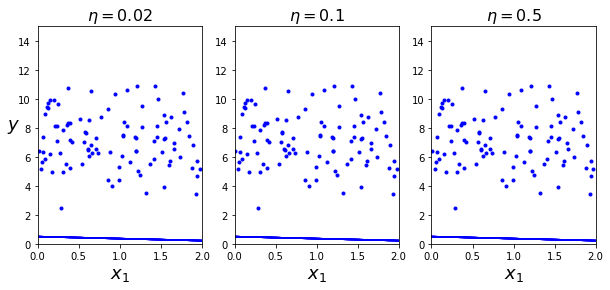

In [28]:
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()